##### Colab

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [5]:
#Imports
import sys
#sys.path.append('/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024')
sys.path.append('/content/drive/MyDrive/06_TUWien/10_ADL')
from scripts.run_cnn import train_model, test_model

from models.resnet18 import ResNet18FineTuned
from scripts.evaluation import analyze_test_results
import torchvision.transforms as transforms

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [6]:
#dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
dataset_path = "/content/Real_AI_SD_LD_Dataset"

#### Train & test using transfer learning (ResNet18)

In [8]:
train_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])

val_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])

test_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])
#freeze_layers=True & freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2'] - what layers need to be frozen
#freeze_layers=False - do not freeze any layers
#freeze_layers=True - freeze all layers except for the last one
freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']
# Config for training and testing
config = {
    'model': ResNet18FineTuned(freeze_layers=True, specific_layers_to_freeze=freeze_layers),
    'dataset_path': dataset_path,
    'model_save_dir': 'saved_models',
    'results_save_dir': 'saved_results',
    'train_transform': train_transform,
    'val_transform': val_transform,
    'test_transform': test_transform,
    'batch_size': 64,
    'learning_rate': 0.001,
    'scheduler_gamma': 0.9,
    'epochs': 10,
    'fraction': 1,
    'val_frequency': 1,
    'debug_mode': True,
    'patience': 3,
    'model_name': "ResNet18"
}

# Train the model

trainer_resnet = train_model(config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


List of parameters that require gradients:
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.weight
layer4.0.bn2.weight
layer4.0.bn2.bias
layer4.0.downsample.0.weight
layer4.0.downsample.1.weight
layer4.0.downsample.1.bias
layer4.1.conv1.weight
layer4.1.bn1.weight
layer4.1.bn1.bias
layer4.1.conv2.weight
layer4.1.bn2.weight
layer4.1.bn2.bias
fc.weight
fc.bias
CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): Ba

Training with batch size: 64
Epoch 0/10:
--- Training epoch 0 ---


Train:   0%|          | 1/1407 [00:00<08:35,  2.73it/s]

Batch 0, Loss: 3.169576644897461


Train:  36%|███▌      | 501/1407 [02:13<04:23,  3.44it/s]

Batch 500, Loss: 1.6128993034362793


Train:  71%|███████   | 1001/1407 [04:27<02:00,  3.38it/s]

Batch 1000, Loss: 1.5464401245117188


Train: 100%|██████████| 1407/1407 [06:14<00:00,  3.75it/s]


Epoch 0 Training Loss: 1.6541271972232394
Training Metrics: Overall Accuracy: 0.4494
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.70
Accuracy for class AI_surrealism: 0.55
Accuracy for class human_art_nouveau: 0.74
Accuracy for class human_expressionism: 0.58
Accuracy for class human_ukiyo_e: 0.50
Accuracy for class AI_renaissance: 0.55
Accuracy for class AI_art_nouveau: 0.54
Accuracy for class human_realism: 0.60
Accuracy for class AI_realism: 0.64
Accuracy for class human_post_impressionism: 0.86
Accuracy for class human_romanticism: 0.30
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.11
Accuracy for class AI_impressionism: 0.21
Accuracy for class human_surrealism: 0.19
Accuracy for class human_renaissance: 0.15
Accuracy for class AI_post_impressionism: 0.30
Accuracy for class AI_ukiyo-e: 0.22
Accuracy for class human_impressionism: 0.19
Accuracy for class AI_romanticism: 0.69
--- Validating epoch 0 ---


Evaluate:   1%|          | 1/157 [00:00<00:39,  3.91it/s]

Batch 0, Validation Loss: 1.3302173614501953


Evaluate: 100%|██████████| 157/157 [00:40<00:00,  3.84it/s]


Epoch 0 Validation Loss: 1.3761471506118774
Validation Metrics: Overall Accuracy: 0.5207
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.81
Accuracy for class AI_ukiyo-e: 0.59
Accuracy for class AI_romanticism: 0.79
Accuracy for class AI_art_nouveau: 0.60
Accuracy for class human_surrealism: 0.67
Accuracy for class AI_renaissance: 0.63
Accuracy for class AI_realism: 0.74
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class human_art_nouveau: 0.80
Accuracy for class AI_post_impressionism: 0.95
Accuracy for class human_baroque: 0.26
Accuracy for class human_impressionism: 0.29
Accuracy for class AI_impressionism: 0.31
Accuracy for class human_renaissance: 0.40
Accuracy for class human_expressionism: 0.10
Accuracy for class human_realism: 0.06
Accuracy for class AI_baroque: 0.39
Accuracy for class human_post_impressionism: 0.45
Accuracy for class AI_surrealism: 0.22
Accuracy for class AI_expressionism: 0.68
#### Best accuracy 0.5207 at epoch 0
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<05:36,  4.17it/s]

Batch 0, Loss: 1.3912692070007324


Train:  36%|███▌      | 501/1407 [02:13<03:46,  4.00it/s]

Batch 500, Loss: 1.677764654159546


Train:  71%|███████   | 1001/1407 [04:26<01:46,  3.80it/s]

Batch 1000, Loss: 1.2264394760131836


Train: 100%|██████████| 1407/1407 [06:14<00:00,  3.76it/s]


Epoch 1 Training Loss: 1.3029559689415826
Training Metrics: Overall Accuracy: 0.5505
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.81
Accuracy for class AI_surrealism: 0.71
Accuracy for class human_art_nouveau: 0.81
Accuracy for class human_expressionism: 0.69
Accuracy for class human_ukiyo_e: 0.62
Accuracy for class AI_renaissance: 0.67
Accuracy for class AI_art_nouveau: 0.69
Accuracy for class human_realism: 0.71
Accuracy for class AI_realism: 0.76
Accuracy for class human_post_impressionism: 0.94
Accuracy for class human_romanticism: 0.37
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.17
Accuracy for class AI_impressionism: 0.28
Accuracy for class human_surrealism: 0.27
Accuracy for class human_renaissance: 0.21
Accuracy for class AI_post_impressionism: 0.45
Accuracy for class AI_ukiyo-e: 0.27
Accuracy for class human_impressionism: 0.33
Accuracy for class AI_romanticism: 0.81
--- Validating epoch 1 ---


Evaluate:   1%|          | 1/157 [00:00<00:36,  4.26it/s]

Batch 0, Validation Loss: 1.2005151510238647


Evaluate: 100%|██████████| 157/157 [00:40<00:00,  3.86it/s]


Epoch 1 Validation Loss: 1.3114029594421386
Validation Metrics: Overall Accuracy: 0.5497
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.76
Accuracy for class AI_ukiyo-e: 0.67
Accuracy for class AI_romanticism: 0.87
Accuracy for class AI_art_nouveau: 0.63
Accuracy for class human_surrealism: 0.69
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_realism: 0.72
Accuracy for class human_ukiyo_e: 0.71
Accuracy for class human_art_nouveau: 0.72
Accuracy for class AI_post_impressionism: 0.95
Accuracy for class human_baroque: 0.39
Accuracy for class human_impressionism: 0.49
Accuracy for class AI_impressionism: 0.06
Accuracy for class human_renaissance: 0.29
Accuracy for class human_expressionism: 0.30
Accuracy for class human_realism: 0.21
Accuracy for class AI_baroque: 0.41
Accuracy for class human_post_impressionism: 0.20
Accuracy for class AI_surrealism: 0.37
Accuracy for class AI_expressionism: 0.82
#### Best accuracy 0.5497 at epoch 1
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<06:16,  3.73it/s]

Batch 0, Loss: 1.383128046989441


Train:  36%|███▌      | 501/1407 [02:12<04:00,  3.77it/s]

Batch 500, Loss: 1.1229000091552734


Train:  71%|███████   | 1001/1407 [04:25<01:43,  3.93it/s]

Batch 1000, Loss: 1.1087405681610107


Train: 100%|██████████| 1407/1407 [06:14<00:00,  3.76it/s]


Epoch 2 Training Loss: 1.1748321941163804
Training Metrics: Overall Accuracy: 0.5918
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.84
Accuracy for class AI_surrealism: 0.75
Accuracy for class human_art_nouveau: 0.84
Accuracy for class human_expressionism: 0.72
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_art_nouveau: 0.75
Accuracy for class human_realism: 0.76
Accuracy for class AI_realism: 0.80
Accuracy for class human_post_impressionism: 0.95
Accuracy for class human_romanticism: 0.40
Accuracy for class AI_expressionism: 0.49
Accuracy for class AI_baroque: 0.23
Accuracy for class AI_impressionism: 0.31
Accuracy for class human_surrealism: 0.32
Accuracy for class human_renaissance: 0.25
Accuracy for class AI_post_impressionism: 0.49
Accuracy for class AI_ukiyo-e: 0.30
Accuracy for class human_impressionism: 0.40
Accuracy for class AI_romanticism: 0.84
--- Validating epoch 2 ---


Evaluate:   1%|          | 1/157 [00:00<00:37,  4.13it/s]

Batch 0, Validation Loss: 1.2250226736068726


Evaluate: 100%|██████████| 157/157 [00:41<00:00,  3.81it/s]


Epoch 2 Validation Loss: 1.2839279542922974
Validation Metrics: Overall Accuracy: 0.5533
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.77
Accuracy for class AI_ukiyo-e: 0.76
Accuracy for class AI_romanticism: 0.82
Accuracy for class AI_art_nouveau: 0.79
Accuracy for class human_surrealism: 0.56
Accuracy for class AI_renaissance: 0.69
Accuracy for class AI_realism: 0.64
Accuracy for class human_ukiyo_e: 0.72
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.95
Accuracy for class human_baroque: 0.33
Accuracy for class human_impressionism: 0.51
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_renaissance: 0.27
Accuracy for class human_expressionism: 0.16
Accuracy for class human_realism: 0.26
Accuracy for class AI_baroque: 0.47
Accuracy for class human_post_impressionism: 0.22
Accuracy for class AI_surrealism: 0.35
Accuracy for class AI_expressionism: 0.83
#### Best accuracy 0.5533 at epoch 2
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<05:48,  4.03it/s]

Batch 0, Loss: 1.2095019817352295


Train:  36%|███▌      | 501/1407 [02:12<04:09,  3.62it/s]

Batch 500, Loss: 1.2947171926498413


Train:  71%|███████   | 1001/1407 [04:25<01:47,  3.77it/s]

Batch 1000, Loss: 0.9813002943992615


Train: 100%|██████████| 1407/1407 [06:13<00:00,  3.77it/s]


Epoch 3 Training Loss: 1.0779751908832127
Training Metrics: Overall Accuracy: 0.6229
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.86
Accuracy for class AI_surrealism: 0.78
Accuracy for class human_art_nouveau: 0.86
Accuracy for class human_expressionism: 0.74
Accuracy for class human_ukiyo_e: 0.69
Accuracy for class AI_renaissance: 0.76
Accuracy for class AI_art_nouveau: 0.78
Accuracy for class human_realism: 0.80
Accuracy for class AI_realism: 0.83
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.43
Accuracy for class AI_expressionism: 0.54
Accuracy for class AI_baroque: 0.28
Accuracy for class AI_impressionism: 0.34
Accuracy for class human_surrealism: 0.36
Accuracy for class human_renaissance: 0.28
Accuracy for class AI_post_impressionism: 0.55
Accuracy for class AI_ukiyo-e: 0.32
Accuracy for class human_impressionism: 0.45
Accuracy for class AI_romanticism: 0.86
--- Validating epoch 3 ---


Evaluate:   1%|          | 1/157 [00:00<00:50,  3.09it/s]

Batch 0, Validation Loss: 1.2886070013046265


Evaluate: 100%|██████████| 157/157 [00:41<00:00,  3.80it/s]


Epoch 3 Validation Loss: 1.2765603939056396
Validation Metrics: Overall Accuracy: 0.5675
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.85
Accuracy for class AI_ukiyo-e: 0.70
Accuracy for class AI_romanticism: 0.80
Accuracy for class AI_art_nouveau: 0.75
Accuracy for class human_surrealism: 0.62
Accuracy for class AI_renaissance: 0.67
Accuracy for class AI_realism: 0.72
Accuracy for class human_ukiyo_e: 0.71
Accuracy for class human_art_nouveau: 0.82
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.29
Accuracy for class human_impressionism: 0.49
Accuracy for class AI_impressionism: 0.21
Accuracy for class human_renaissance: 0.37
Accuracy for class human_expressionism: 0.25
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.48
Accuracy for class human_post_impressionism: 0.28
Accuracy for class AI_surrealism: 0.34
Accuracy for class AI_expressionism: 0.84
#### Best accuracy 0.5675 at epoch 3
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<06:46,  3.46it/s]

Batch 0, Loss: 1.125260353088379


Train:  36%|███▌      | 501/1407 [02:13<04:04,  3.71it/s]

Batch 500, Loss: 1.4053802490234375


Train:  71%|███████   | 1001/1407 [04:25<01:55,  3.53it/s]

Batch 1000, Loss: 1.1086589097976685


Train: 100%|██████████| 1407/1407 [06:12<00:00,  3.78it/s]


Epoch 4 Training Loss: 0.9905891872406006
Training Metrics: Overall Accuracy: 0.6531
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.88
Accuracy for class AI_surrealism: 0.81
Accuracy for class human_art_nouveau: 0.88
Accuracy for class human_expressionism: 0.77
Accuracy for class human_ukiyo_e: 0.72
Accuracy for class AI_renaissance: 0.80
Accuracy for class AI_art_nouveau: 0.81
Accuracy for class human_realism: 0.82
Accuracy for class AI_realism: 0.85
Accuracy for class human_post_impressionism: 0.97
Accuracy for class human_romanticism: 0.48
Accuracy for class AI_expressionism: 0.56
Accuracy for class AI_baroque: 0.32
Accuracy for class AI_impressionism: 0.37
Accuracy for class human_surrealism: 0.39
Accuracy for class human_renaissance: 0.33
Accuracy for class AI_post_impressionism: 0.58
Accuracy for class AI_ukiyo-e: 0.37
Accuracy for class human_impressionism: 0.48
Accuracy for class AI_romanticism: 0.89
--- Validating epoch 4 ---


Evaluate:   1%|          | 1/157 [00:00<00:36,  4.25it/s]

Batch 0, Validation Loss: 1.3480228185653687


Evaluate: 100%|██████████| 157/157 [00:40<00:00,  3.85it/s]


Epoch 4 Validation Loss: 1.3023119367599487
Validation Metrics: Overall Accuracy: 0.5584
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.84
Accuracy for class AI_ukiyo-e: 0.69
Accuracy for class AI_romanticism: 0.84
Accuracy for class AI_art_nouveau: 0.65
Accuracy for class human_surrealism: 0.71
Accuracy for class AI_renaissance: 0.63
Accuracy for class AI_realism: 0.76
Accuracy for class human_ukiyo_e: 0.71
Accuracy for class human_art_nouveau: 0.74
Accuracy for class AI_post_impressionism: 0.94
Accuracy for class human_baroque: 0.32
Accuracy for class human_impressionism: 0.48
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_renaissance: 0.27
Accuracy for class human_expressionism: 0.24
Accuracy for class human_realism: 0.35
Accuracy for class AI_baroque: 0.43
Accuracy for class human_post_impressionism: 0.19
Accuracy for class AI_surrealism: 0.40
Accuracy for class AI_expressionism: 0.82
Early stopping counter: 1/3
Epoch 5/10:
--- Training epoch 5 ---

Train:   0%|          | 1/1407 [00:00<06:19,  3.70it/s]

Batch 0, Loss: 1.0071752071380615


Train:  36%|███▌      | 501/1407 [02:13<04:01,  3.74it/s]

Batch 500, Loss: 0.9742550253868103


Train:  71%|███████   | 1001/1407 [04:25<01:47,  3.76it/s]

Batch 1000, Loss: 0.923180341720581


Train: 100%|██████████| 1407/1407 [06:13<00:00,  3.76it/s]


Epoch 5 Training Loss: 0.9121009079403347
Training Metrics: Overall Accuracy: 0.6787
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.89
Accuracy for class AI_surrealism: 0.82
Accuracy for class human_art_nouveau: 0.90
Accuracy for class human_expressionism: 0.78
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class AI_renaissance: 0.81
Accuracy for class AI_art_nouveau: 0.83
Accuracy for class human_realism: 0.84
Accuracy for class AI_realism: 0.88
Accuracy for class human_post_impressionism: 0.97
Accuracy for class human_romanticism: 0.50
Accuracy for class AI_expressionism: 0.59
Accuracy for class AI_baroque: 0.38
Accuracy for class AI_impressionism: 0.40
Accuracy for class human_surrealism: 0.43
Accuracy for class human_renaissance: 0.36
Accuracy for class AI_post_impressionism: 0.61
Accuracy for class AI_ukiyo-e: 0.39
Accuracy for class human_impressionism: 0.54
Accuracy for class AI_romanticism: 0.90
--- Validating epoch 5 ---


Evaluate:   1%|          | 1/157 [00:00<00:37,  4.15it/s]

Batch 0, Validation Loss: 1.3859660625457764


Evaluate: 100%|██████████| 157/157 [00:40<00:00,  3.84it/s]


Epoch 5 Validation Loss: 1.3312644639968871
Validation Metrics: Overall Accuracy: 0.5615
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.83
Accuracy for class AI_ukiyo-e: 0.68
Accuracy for class AI_romanticism: 0.83
Accuracy for class AI_art_nouveau: 0.73
Accuracy for class human_surrealism: 0.63
Accuracy for class AI_renaissance: 0.63
Accuracy for class AI_realism: 0.73
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class human_art_nouveau: 0.75
Accuracy for class AI_post_impressionism: 0.94
Accuracy for class human_baroque: 0.27
Accuracy for class human_impressionism: 0.53
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_renaissance: 0.29
Accuracy for class human_expressionism: 0.29
Accuracy for class human_realism: 0.35
Accuracy for class AI_baroque: 0.40
Accuracy for class human_post_impressionism: 0.20
Accuracy for class AI_surrealism: 0.40
Accuracy for class AI_expressionism: 0.79
Early stopping counter: 2/3
Epoch 6/10:
--- Training epoch 6 ---

Train:   0%|          | 1/1407 [00:00<06:10,  3.80it/s]

Batch 0, Loss: 0.9809457063674927


Train:  36%|███▌      | 501/1407 [02:13<03:50,  3.93it/s]

Batch 500, Loss: 1.0221941471099854


Train:  71%|███████   | 1001/1407 [04:26<01:49,  3.70it/s]

Batch 1000, Loss: 0.8589962124824524


Train: 100%|██████████| 1407/1407 [06:13<00:00,  3.77it/s]


Epoch 6 Training Loss: 0.8354516322029961
Training Metrics: Overall Accuracy: 0.7045
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.90
Accuracy for class AI_surrealism: 0.84
Accuracy for class human_art_nouveau: 0.91
Accuracy for class human_expressionism: 0.80
Accuracy for class human_ukiyo_e: 0.77
Accuracy for class AI_renaissance: 0.83
Accuracy for class AI_art_nouveau: 0.85
Accuracy for class human_realism: 0.86
Accuracy for class AI_realism: 0.88
Accuracy for class human_post_impressionism: 0.98
Accuracy for class human_romanticism: 0.54
Accuracy for class AI_expressionism: 0.64
Accuracy for class AI_baroque: 0.41
Accuracy for class AI_impressionism: 0.43
Accuracy for class human_surrealism: 0.47
Accuracy for class human_renaissance: 0.40
Accuracy for class AI_post_impressionism: 0.65
Accuracy for class AI_ukiyo-e: 0.43
Accuracy for class human_impressionism: 0.59
Accuracy for class AI_romanticism: 0.91
--- Validating epoch 6 ---


Evaluate:   1%|          | 1/157 [00:00<00:35,  4.35it/s]

Batch 0, Validation Loss: 1.3671636581420898


Evaluate: 100%|██████████| 157/157 [00:40<00:00,  3.84it/s]


Epoch 6 Validation Loss: 1.3636715269088746
Validation Metrics: Overall Accuracy: 0.5612
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.82
Accuracy for class AI_ukiyo-e: 0.74
Accuracy for class AI_romanticism: 0.86
Accuracy for class AI_art_nouveau: 0.66
Accuracy for class human_surrealism: 0.66
Accuracy for class AI_renaissance: 0.69
Accuracy for class AI_realism: 0.69
Accuracy for class human_ukiyo_e: 0.73
Accuracy for class human_art_nouveau: 0.74
Accuracy for class AI_post_impressionism: 0.93
Accuracy for class human_baroque: 0.32
Accuracy for class human_impressionism: 0.50
Accuracy for class AI_impressionism: 0.23
Accuracy for class human_renaissance: 0.42
Accuracy for class human_expressionism: 0.15
Accuracy for class human_realism: 0.23
Accuracy for class AI_baroque: 0.45
Accuracy for class human_post_impressionism: 0.26
Accuracy for class AI_surrealism: 0.36
Accuracy for class AI_expressionism: 0.78
Early stopping counter: 3/3
Early stopping triggered.


epoch,▁▂▄▅▇█
train/acc,▁▄▅▆▇█
train/loss,█▅▃▃▂▁
val/acc,▁▅▆█▇▇
val/loss,█▃▂▁▃▅
epoch,5
train/acc,0.67866
train/loss,0.9121
val/acc,0.5615
val/loss,1.33126


In [10]:
# Test the model (reuse the trainer)
test_loss, test_accuracy, test_per_class_accuracy, all_labels, all_predictions, test_classes = test_model(config, trainer=None)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 

Testing the model...


Test: 100%|██████████| 469/469 [02:18<00:00,  3.39it/s]

Test Metrics: Overall Accuracy: 0.6318
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.86
Accuracy for class AI_expressionism: 0.70
Accuracy for class AI_baroque: 0.81
Accuracy for class AI_ukiyo-e: 0.74
Accuracy for class human_renaissance: 0.57
Accuracy for class human_post_impressionism: 0.70
Accuracy for class human_realism: 0.73
Accuracy for class AI_art_nouveau: 0.74
Accuracy for class AI_romanticism: 0.81
Accuracy for class AI_renaissance: 0.97
Accuracy for class human_expressionism: 0.32
Accuracy for class AI_impressionism: 0.48
Accuracy for class AI_post_impressionism: 0.20
Accuracy for class human_baroque: 0.33
Accuracy for class AI_surrealism: 0.23
Accuracy for class human_impressionism: 0.20
Accuracy for class AI_realism: 0.46
Accuracy for class human_surrealism: 0.28
Accuracy for class human_art_nouveau: 0.36
Accuracy for class human_ukiyo_e: 0.80


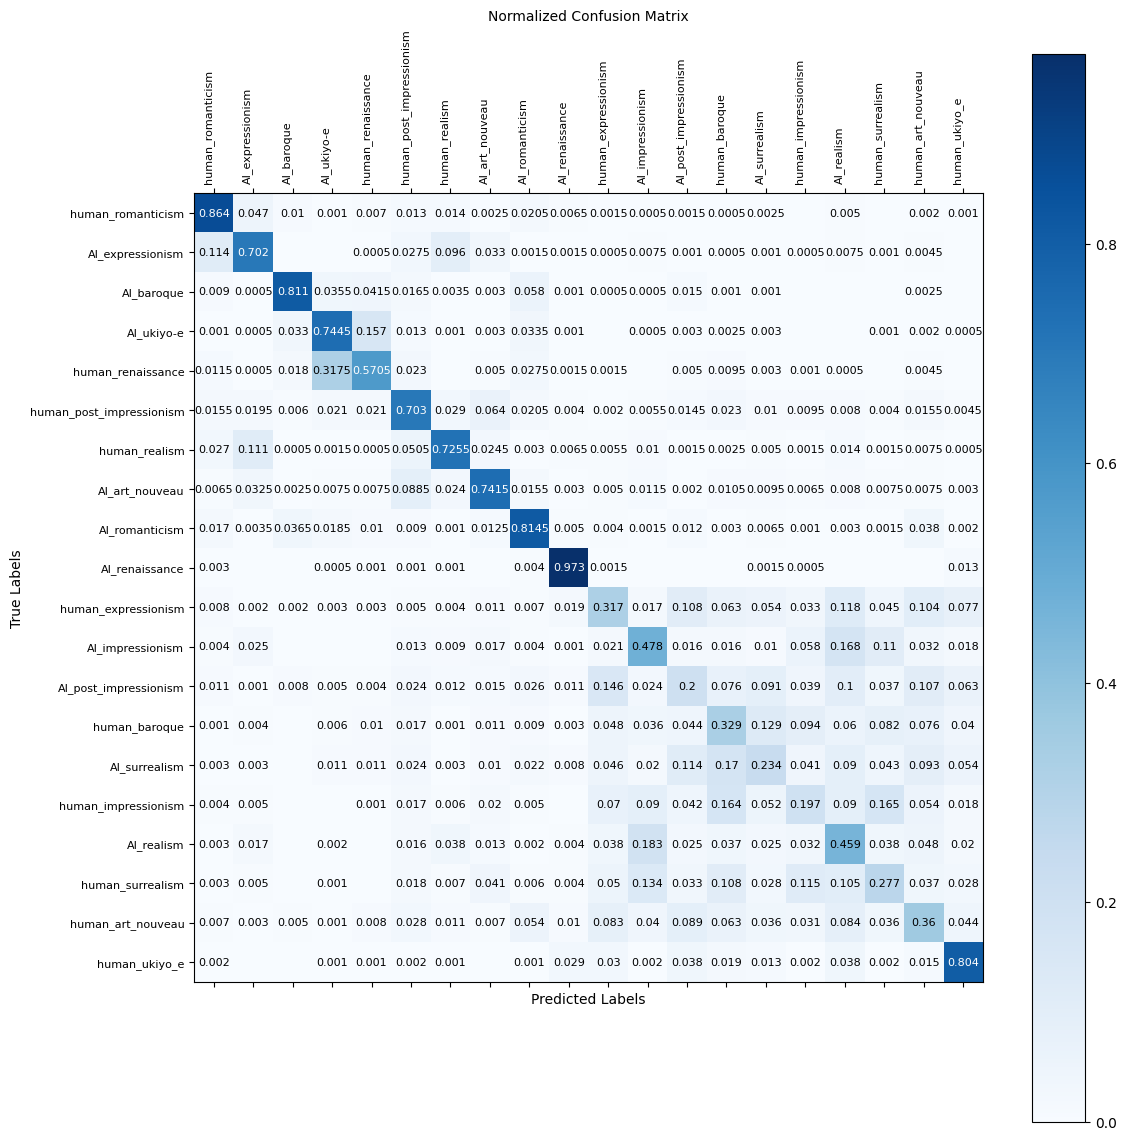


Classification Report:
                          precision    recall  f1-score   support

       human_romanticism       0.79      0.86      0.83      2000
        AI_expressionism       0.74      0.70      0.72      2000
              AI_baroque       0.88      0.81      0.84      2000
              AI_ukiyo-e       0.64      0.74      0.69      2000
       human_renaissance       0.68      0.57      0.62      2000
human_post_impressionism       0.68      0.70      0.69      2000
           human_realism       0.77      0.73      0.75      2000
          AI_art_nouveau       0.77      0.74      0.76      2000
          AI_romanticism       0.76      0.81      0.79      2000
          AI_renaissance       0.93      0.97      0.95      2000
     human_expressionism       0.35      0.32      0.33      1000
        AI_impressionism       0.43      0.48      0.46      1000
   AI_post_impressionism       0.24      0.20      0.22      1000
           human_baroque       0.29      0.33      

In [11]:
# Analyze test results
metrics = analyze_test_results(
    test_loss=test_loss,
    test_accuracy=test_accuracy,
    test_per_class_accuracy=test_per_class_accuracy,
    all_labels=all_labels,
    all_predictions=all_predictions,
    classes=test_classes
)